# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import requests
import time
import json

from citipy import citipy

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [40]:
############# LATITUDE AND LONGITUDE SIZE TO BE CHANGED TO SIZE = 1500 BEFORE SUBMITTING !!!!!!!!!!!

# Set random number seed 
np.random.seed(100)

# Create a list of random latitudes and longitudes
lats = np.random.randint(-90, 90, size=20)
longs = np.random.randint(-180, 180, size=20)

# Place these latitude and longitude lists into a DataFrame
coords = pd.DataFrame({"Latitude": lats, "Longitude": longs})

# Show preview of DataFrame
coords.head()

,Latitude,Longitude
0,-82,-43
1,-66,-87
2,-23,-94
3,13,-25
4,-3,-39


In [41]:
# Create empty list to append the retrieved cities
cities = []

# Create a loop to go through the coords dataframe rows and to look up the closest city from each latitude and longitude
for ind, row in coords.iterrows():
    
    # Retrieve the latitude and longitude for a row
    lat, lon = row['Latitude'], row['Longitude']
    
    # Use citipy to find closest city
    city = citipy.nearest_city(lat, lon)
    city = city.city_name
    
    # Add retrieved city to cities list if it is not already in the list
    if city not in cities:
        cities.append(city)

# Print the final amount of cities retrieved
len(cities)

20

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [42]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set time to pause between each loop to enable api data retrieval
time_between = 1

# Set empty lists to fill during loop
final_city = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Log counter
record = 0
set = 1

# Print log of each city
print("Beginning Data Retrieval")     
print("-----------------------------")

# Create a loop to loop through each city and retrieve weather data to append to lists, pausing for a second at the end of each loop   
for city in cities:    
            
    try:
        response = requests.get(query_url + city).json()
        
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # Add to log counter
        if record >= 50:
            record = 1
            set += 1
            final_city.append(city)
        else:
            record += 1
            final_city.append(city)
            
        print(f"Processing Record {record} of Set {set} | {city}")
        
    except KeyError:
        print("City not found. Skipping...")

    time.sleep(time_between)

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | trairi
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | berlevag
Processing Record 8 of Set 1 | kirkland lake
City not found. Skipping...
Processing Record 9 of Set 1 | santa cruz
Processing Record 10 of Set 1 | stawell
Processing Record 11 of Set 1 | ilhabela
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | tashtyp
Processing Record 16 of Set 1 | kidal
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | port macquarie
Processing Record 19 of Set 1 | provideniya
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
# Create a dataframe from the retrieved weather data
weather_dict = {"City": final_city,
                "Lat": lat,
                "Lng": long,
                "Max. Temp": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed,
                "Country": country,
                "Date": date}

weather_data_df = pd.DataFrame(weather_dict)

# Show preview of weather dataframe
weather_data_df.head()

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,5.00,87,0,5.14,AR,1618911203
1,punta arenas,-53.1500,-70.9167,6.00,70,0,9.26,CL,1618911151
2,pisco,-13.7000,-76.2167,19.00,82,99,1.54,PE,1618911205
3,sao filipe,14.8961,-24.4956,22.11,77,97,6.26,CV,1618911207
4,trairi,-3.2778,-39.2689,23.88,92,88,1.67,BR,1618911208


In [44]:
weather_data_df.count()

City          19
Lat           19
Lng           19
Max. Temp     19
Humidity      19
Cloudiness    19
Wind Speed    19
Country       19
Date          19
dtype: int64

In [45]:
# Create a summary statistics table frome the weather_data dataframe
weather_data_df[['Lat', 'Lng', 'Max. Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].describe()

,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Date
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01
mean,-3.360595,-1.144489,15.031579,70.421053,43.842105,3.683684,1.618911e+09
std,39.684823,97.005995,11.864210,21.103754,42.345488,2.609862,8.021794e+01
min,-54.800000,-173.300000,-5.440000,5.000000,0.000000,0.450000,1.618911e+09
25%,-32.926000,-69.608350,6.165000,66.000000,1.000000,1.605000,1.618911e+09
50%,-17.800000,-24.495600,19.000000,71.000000,37.000000,3.270000,1.618911e+09
75%,20.363300,73.827900,23.050000,86.000000,87.500000,5.090000,1.618911e+09
max,70.857800,152.916700,35.910000,94.000000,100.000000,9.770000,1.618911e+09


In [46]:
# Save weather dataframe as a csv
weather_data_df.to_csv(r'output_data\weather_data.csv', encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [47]:
cleaned_weather_data_df = weather_data_df.query("Humidity < 100")
cleaned_weather_data_df.head()

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,5.00,87,0,5.14,AR,1618911203
1,punta arenas,-53.1500,-70.9167,6.00,70,0,9.26,CL,1618911151
2,pisco,-13.7000,-76.2167,19.00,82,99,1.54,PE,1618911205
3,sao filipe,14.8961,-24.4956,22.11,77,97,6.26,CV,1618911207
4,trairi,-3.2778,-39.2689,23.88,92,88,1.67,BR,1618911208


In [48]:
high_humidity_df = weather_data_df.query("Humidity >= 100")
high_humidity_df.head()

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [49]:
#  Get the indices of cities that have humidity over 100%
indices = weather_data_df[weather_data_df['Humidity']>=100].index.tolist()
indices


[]

In [67]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_data_df.drop(indices, inplace=False)
clean_city_data_df.head()

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,5.00,87,0,5.14,AR,1618911203
1,punta arenas,-53.1500,-70.9167,6.00,70,0,9.26,CL,1618911151
2,pisco,-13.7000,-76.2167,19.00,82,99,1.54,PE,1618911205
3,sao filipe,14.8961,-24.4956,22.11,77,97,6.26,CV,1618911207
4,trairi,-3.2778,-39.2689,23.88,92,88,1.67,BR,1618911208


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

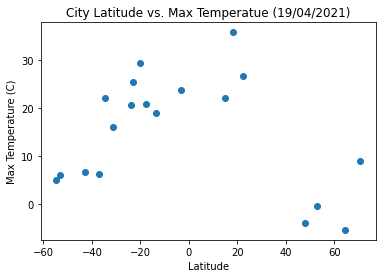

Latitude of city plotted against maximum temperature of the city on 19/04/2021.


In [51]:
# Set x and y axis for scatter plot of Latitude vs. Max Temperature
x_axis = clean_city_data_df["Lat"]
y_axis = clean_city_data_df["Max. Temp"]

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title('City Latitude vs. Max Temperature (19/04/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Show scatter plot
plt.show()
print("Latitude of city plotted against maximum temperature of the city on 19/04/2021.")

## Latitude vs. Humidity Plot

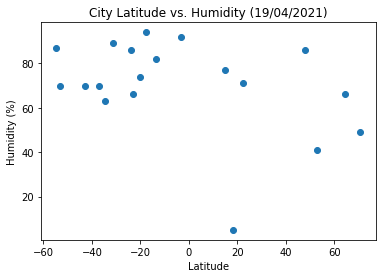

Latitude of city plotted against humidity of the city on 19/04/2021.


In [52]:
# Set x and y axis for scatter plot of Latitude vs. Humidity
x_axis = clean_city_data_df["Lat"]
y_axis = clean_city_data_df["Humidity"]

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title('City Latitude vs. Humidity (19/04/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Show scatter plot
plt.show()
print("Latitude of city plotted against humidity of the city on 19/04/2021.")

## Latitude vs. Cloudiness Plot

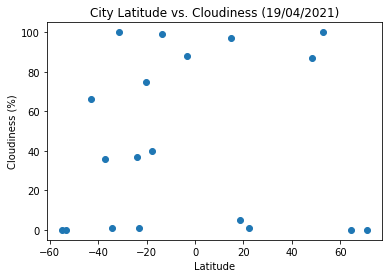

Latitude of city plotted against Cloudiness of the city on 19/04/2021.


In [53]:
# Set x and y axis for scatter plot of Latitude vs. Cloudiness
x_axis = clean_city_data_df["Lat"]
y_axis = clean_city_data_df["Cloudiness"]

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title('City Latitude vs. Cloudiness (19/04/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Show scatter plot
plt.show()
print("Latitude of city plotted against Cloudiness of the city on 19/04/2021.")

## Latitude vs. Wind Speed Plot

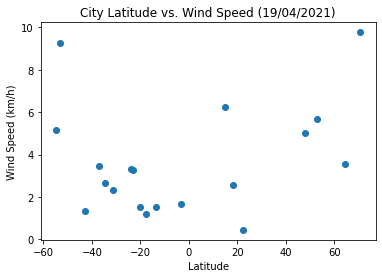

Latitude of city plotted against Wind Speed of the city on 19/04/2021.


In [54]:
# Set date x and y axis for scatter plot of Latitude vs. Wind Speed
x_axis = clean_city_data_df["Lat"]
y_axis = clean_city_data_df["Wind Speed"]

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title('City Latitude vs. Wind Speed (19/04/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')

# Show scatter plot
plt.show()
print("Latitude of city plotted against Wind Speed of the city on 19/04/2021.")

## Linear Regression

In [68]:
# Reduce the clean dataframe to cities only in the Northern Hemisphere
northern_hemisphere_df = clean_city_data_df[~(clean_city_data_df['Lat'] <=0)]
northern_hemisphere_df

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,sao filipe,14.8961,-24.4956,22.11,77,97,6.26,CV,1618911207
5,victoria,22.2855,114.1577,26.67,71,1,0.45,HK,1618910917
6,berlevag,70.8578,29.0864,9.00,49,0,9.77,NO,1618911210
7,kirkland lake,48.1446,-80.0377,-4.00,86,87,5.04,CA,1618911211
14,tashtyp,52.7939,89.8983,-0.37,41,100,5.66,RU,1618911221
15,kidal,18.4411,1.4078,35.91,5,5,2.55,ML,1618911222
18,provideniya,64.3833,-173.3000,-5.44,66,0,3.54,RU,1618911179


In [70]:
# Reduce the clean dataframe to cities only in the Southern Hemisphere
southern_hemisphere_df = clean_city_data_df[~(clean_city_data_df['Lat'] >=0)]
southern_hemisphere_df

,City,Lat,Lng,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,5.00,87,0,5.14,AR,1618911203
1,punta arenas,-53.1500,-70.9167,6.00,70,0,9.26,CL,1618911151
2,pisco,-13.7000,-76.2167,19.00,82,99,1.54,PE,1618911205
4,trairi,-3.2778,-39.2689,23.88,92,88,1.67,BR,1618911208
8,santa cruz,-17.8000,-63.1667,21.00,94,40,1.19,BO,1618911214
9,stawell,-37.0500,142.7667,6.33,70,36,3.44,AU,1618911215
10,ilhabela,-23.7781,-45.3581,20.66,86,37,3.34,BR,1618911216
11,rikitea,-23.1203,-134.9692,25.41,66,1,3.27,PF,1618911150
12,hermanus,-34.4187,19.2345,22.22,63,1,2.68,ZA,1618911219
13,new norfolk,-42.7826,147.0587,6.67,70,66,1.34,AU,1618911220


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

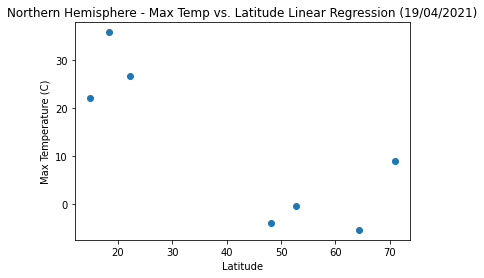

Latitude of Norther cities plotted against maximum temperature of those cities on 19/04/2021.


In [72]:
# Set x and y axis for scatter plot of Northern Hemisphere Latitude vs. Max Temperature
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Max. Temp"]

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression (19/04/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Show scatter plot
plt.show()
print("Latitude of Norther cities plotted against maximum temperature of those cities on 19/04/2021.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression